In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import linear_model, decomposition, datasets
from sklearn import svm
import math
from sklearn import metrics

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3066161,Regency,LA TROBE STREET,RUSSELL STREET,EXHIBITION STREET,4,3661S,23/12/2011 07:45:07 PM,23/12/2011 08:30:00 PM,2693,2P MTR M-F 9:30-20:30,0,856,2094
11175785,Hyatt,EXHIBITION STREET,Lt COLLINS STREET,COLLINS STREET,1,C392,30/08/2012 10:16:18 AM,30/08/2012 10:50:27 AM,2049,1P MTR M-SAT 7:30-19:30,0,647,6946
5504062,Spencer,BOURKE STREET,SPENCER STREET,KING STREET,3,2476N,08/03/2012 07:15:20 PM,08/03/2012 08:02:11 PM,2811,2P DIS M-SUN 0:00-23:59,0,123,1435
1774629,Titles,A'BECKETT STREET,QUEEN STREET,ELIZABETH STREET,4,6019S,18/11/2011 07:25:42 PM,18/11/2011 07:30:00 PM,258,LZ 15M M-SAT 7:30-19:30,0,5,2311
9453857,Hyatt,Lt COLLINS STREET,EXHIBITION STREET,SPRING STREET,4,2153S,09/07/2012 03:19:15 PM,09/07/2012 03:21:21 PM,126,1P TKT A M-SAT 7:30-19:30,0,911,5005


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
6320369,Princes Theatre,EXHIBITION STREET,LONSDALE STREET,Lt BOURKE STREET,1,C492,03/04/2012 10:14:07 AM,03/04/2012 11:03:45 AM,2978,1P MTR M-SAT 7:30-19:30,0,647,396
1733919,Hyatt,EXHIBITION STREET,COLLINS STREET,FLINDERS LANE,5,291W,18/11/2011 07:30:09 AM,18/11/2011 07:34:27 AM,258,1P M-SAT 7:30-19:30,0,647,153
2956755,The Mac,SWANSTON STREET,FRANKLIN STREET,LA TROBE STREET,5,4607W,21/12/2011 01:06:32 PM,21/12/2011 01:07:56 PM,84,1/2P MTR M-F 7:30-19:30,0,1329,3666
4380072,Princes Theatre,EXHIBITION STREET,Lt BOURKE STREET,BOURKE STREET,2,448E,04/02/2012 03:22:17 PM,04/02/2012 03:26:29 PM,252,1/2P M-SAT 7:30-19:30,0,647,202
5507491,Hardware,QUEEN STREET,Lt BOURKE STREET,BOURKE STREET,1,C1128,09/03/2012 07:30:08 AM,09/03/2012 07:32:02 AM,114,1P MTR M-SAT 7:30-19:30,0,1171,5365


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1018
Princes Theatre     758
Victoria Market     677
Regency             654
Southbank           626
The Mac             611
Hyatt               594
Titles              573
Rialto              449
Chinatown           437
City Square         416
Hardware            410
County              407
Courtney            403
Magistrates         383
Banks               382
Spencer             348
RACV                291
Jolimont            288
Supreme             168
Docklands            57
Tavistock            48
West Melbourne        2
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3066161,REGENCY,LA TROBE STREET,RUSSELL STREET,EXHIBITION STREET,4,3661S,23/12/2011 07:45:07 PM,23/12/2011 08:30:00 PM,2693,2P MTR M-F 9:30-20:30,0,856,2094
11175785,HYATT,EXHIBITION STREET,LT COLLINS STREET,COLLINS STREET,1,C392,30/08/2012 10:16:18 AM,30/08/2012 10:50:27 AM,2049,1P MTR M-SAT 7:30-19:30,0,647,6946
5504062,SPENCER,BOURKE STREET,SPENCER STREET,KING STREET,3,2476N,08/03/2012 07:15:20 PM,08/03/2012 08:02:11 PM,2811,2P DIS M-SUN 0:00-23:59,0,123,1435
1774629,TITLES,A'BECKETT STREET,QUEEN STREET,ELIZABETH STREET,4,6019S,18/11/2011 07:25:42 PM,18/11/2011 07:30:00 PM,258,LZ 15M M-SAT 7:30-19:30,0,5,2311
9453857,HYATT,LT COLLINS STREET,EXHIBITION STREET,SPRING STREET,4,2153S,09/07/2012 03:19:15 PM,09/07/2012 03:21:21 PM,126,1P TKT A M-SAT 7:30-19:30,0,911,5005


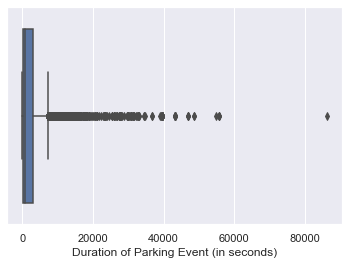

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])

In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             961
QUEEN STREET                689
LA TROBE STREET             619
COLLINS STREET              550
EXHIBITION STREET           550
ELIZABETH STREET            500
FRANKLIN STREET             499
RUSSELL STREET              498
BOURKE STREET               448
LT LONSDALE STREET          370
SPRING STREET               284
FLINDERS LANE               281
KING STREET                 245
LT COLLINS STREET           238
ERROL STREET                236
WILLIAM STREET              205
LT BOURKE STREET            175
A'BECKETT STREET            172
COVENTRY STREET             150
SPENCER STREET              146
FLINDERS STREET             139
VICTORIA STREET             135
QUEENSBERRY STREET          119
THERRY STREET               105
ALBERT STREET               100
CAPEL STREET                 98
DORCAS STREET                96
GRANT STREET                 84
LEVESON STREET               83
COBDEN STREET                83
KAVANAGH STREET              82
O'CONNEL

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            888
QUEEN STREET           863
QUEENSBERRY STREET     632
WILLIAM STREET         615
RUSSELL STREET         599
SWANSTON STREET        496
SPENCER STREET         471
EXHIBITION STREET      448
LT LONSDALE STREET     411
LONSDALE STREET        394
LT COLLINS STREET      343
VICTORIA STREET        324
COLLINS STREET         286
BOURKE STREET          269
ELIZABETH STREET       260
LT BOURKE STREET       242
FLINDERS LANE          207
LA TROBE STREET        161
THERRY STREET          149
WILLAM STREET          138
A'BECKETT STREET       127
FRANKLIN STREET        126
WELLS STREET           124
O'CONNELL STREET        93
SOUTHBANK BOULEVARD     92
DODDS STREET            89
KINGS WAY               88
ERROL STREET            87
FLINDERS STREET         74
PELHAM STREET           70
STURT STREET            67
BALSTON STREET          66
VICTORIA PARADE         57
HOWARD STREET           53
COBDEN STREET           49
PEEL STREET             45
MACARTHUR STREET        41
A

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

ELIZABETH STREET       884
WILLIAM STREET         840
VICTORIA STREET        803
QUEEN STREET           739
EXHIBITION STREET      587
KING STREET            471
SPRING STREET          453
LONSDALE STREET        433
RUSSELL STREET         430
LT BOURKE STREET       394
FLINDERS LANE          360
COLLINS STREET         343
LT COLLINS STREET      269
SWANSTON STREET        260
BOURKE STREET          242
LA TROBE STREET        232
FLINDERS STREET        207
LT LONSDALE STREET     196
FRANKLIN STREET        149
DODDS STREET           144
ST KILDA ROAD          124
QUEENSBERRY STREET     109
LANSDOWNE STREET       100
LEVESON STREET          87
POWER STREET            81
A'BECKETT STREET        80
WALSH STREET            63
THERRY STREET           63
STURT STREET            57
WELLS STREET            52
HAWKE STREET            51
CAPEL STREET            49
KAVANAGH STREET         46
STANLEY STREET          41
MILES STREET            40
GISBORNE STREET         39
ELM STREET              33
D

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3066161,REGENCY,LA TROBE STREET,RUSSELL STREET,EXHIBITION STREET,4,3661S,2011-12-23 19:45:07,2011-12-23 20:30:00,2693,2P MTR M-F 9:30-20:30,0,856,2094
11175785,HYATT,EXHIBITION STREET,LT COLLINS STREET,COLLINS STREET,1,C392,2012-08-30 10:16:18,2012-08-30 10:50:27,2049,1P MTR M-SAT 7:30-19:30,0,647,6946
5504062,SPENCER,BOURKE STREET,SPENCER STREET,KING STREET,3,2476N,2012-08-03 19:15:20,2012-08-03 20:02:11,2811,2P DIS M-SUN 0:00-23:59,0,123,1435
1774629,TITLES,A'BECKETT STREET,QUEEN STREET,ELIZABETH STREET,4,6019S,2011-11-18 19:25:42,2011-11-18 19:30:00,258,LZ 15M M-SAT 7:30-19:30,0,5,2311
9453857,HYATT,LT COLLINS STREET,EXHIBITION STREET,SPRING STREET,4,2153S,2012-09-07 15:19:15,2012-09-07 15:21:21,126,1P TKT A M-SAT 7:30-19:30,0,911,5005


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
6320369,PRINCES THEATRE,EXHIBITION STREET,LONSDALE STREET,LT BOURKE STREET,1,C492,2012-03-04 10:14:07,2012-03-04 11:03:45,2978,1P MTR M-SAT 7:30-19:30,0,647,396
1733919,HYATT,EXHIBITION STREET,COLLINS STREET,FLINDERS LANE,5,291W,2011-11-18 07:30:09,2011-11-18 07:34:27,258,1P M-SAT 7:30-19:30,0,647,153
2956755,THE MAC,SWANSTON STREET,FRANKLIN STREET,LA TROBE STREET,5,4607W,2011-12-21 13:06:32,2011-12-21 13:07:56,84,1/2P MTR M-F 7:30-19:30,0,1329,3666
4380072,PRINCES THEATRE,EXHIBITION STREET,LT BOURKE STREET,BOURKE STREET,2,448E,2012-04-02 15:22:17,2012-04-02 15:26:29,252,1/2P M-SAT 7:30-19:30,0,647,202
5507491,HARDWARE,QUEEN STREET,LT BOURKE STREET,BOURKE STREET,1,C1128,2012-09-03 07:30:08,2012-09-03 07:32:02,114,1P MTR M-SAT 7:30-19:30,0,1171,5365


### SVM Classification Model on Predicitive Analytics question 3

In [19]:
#Target field identification
target = parkingdata['Street Name']

unique_vals = target.unique()
target.replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

target.head(10)

3066161     0
11175785    1
5504062     2
1774629     3
9453857     4
8518783     1
11063976    5
5809806     6
10582203    2
3251076     7
Name: Street Name, dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Street Name', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
3066161,0,0,0,0,0,4,2693,856,2094,19,20
11175785,1,1,1,1,0,1,2049,647,6946,10,10
5504062,2,2,2,2,0,3,2811,123,1435,19,20
1774629,3,3,3,3,0,4,258,5,2311,19,19
9453857,1,4,4,4,0,4,126,911,5005,15,15
8518783,0,5,5,5,0,1,66,647,272,9,9
11063976,4,6,6,6,1,5,21596,839,7053,9,15
5809806,5,7,7,7,0,2,561,1101,2359,18,18
10582203,6,8,8,8,1,4,8150,123,1368,10,13
3251076,7,3,3,1,0,1,3608,894,2007,15,16


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
param_grid = {'C': np.logspace(-4, 4, 20), 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
             'max_iter' : [100, 1000, 2500, 5000]}

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 5, 
                                    n_repeats = 1, 
                                    random_state = 1)
        

clf_GS = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv = cv_method, verbose=True, scoring = 'accuracy', return_train_score = True, n_jobs=-1)

In [23]:
#Fit the model with the dataset
best_clf = clf_GS.fit(features, target)
#LogisticRegression().get_params().keys()

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 55.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 87.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 129.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 180.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 239.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 308.6min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 387.6min
[Parallel(n_jobs

In [24]:
clf_GS.best_params_

{'C': 0.0006951927961775605, 'gamma': 1, 'kernel': 'linear', 'max_iter': 5000}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 1
Best C: 0.0006951927961775605
Best max iteration: 5000
Best kernel: linear


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.1215
1,0.000100,1.000,rbf,1000,0.0961
2,0.000100,1.000,rbf,2500,0.0961
3,0.000100,1.000,rbf,5000,0.0961
4,0.000100,1.000,poly,100,0.0373
5,0.000100,1.000,poly,1000,0.0791
6,0.000100,1.000,poly,2500,0.1171
7,0.000100,1.000,poly,5000,0.1572
8,0.000100,1.000,sigmoid,100,0.0619
9,0.000100,1.000,sigmoid,1000,0.0961


In [27]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

In [28]:
# Hill climbing w/ SVM
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = SVM.fit(x_train, y_train)
    cur_Score = SVM.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.161


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 2 selected features: 0.1685


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 3 selected features: 0.1685


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 4 selected features: 0.177


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 5 selected features: 0.203


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 6 selected features: 0.2935


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 7 selected features: 0.9595


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 8 selected features: 0.9595


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 9 selected features: 0.9595

Indexs of the desired features
[2, 3, 4, 9, 1, 0, 7, 10, 5]


In [29]:
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 2,Sign,In Violation?,Arrival Hour,Between Street 1,Area Name,Street ID,Departure Hour,Side Of Street
3066161,0,0,0,19,0,0,856,20,4
11175785,1,1,0,10,1,1,647,10,1
5504062,2,2,0,19,2,2,123,20,3
1774629,3,3,0,19,3,3,5,19,4
9453857,4,4,0,15,4,1,911,15,4
8518783,5,5,0,9,5,0,647,9,1
11063976,6,6,1,9,6,4,839,15,5
5809806,7,7,0,18,7,5,1101,18,2
10582203,8,8,1,10,8,6,123,13,4
3251076,3,1,0,15,3,7,894,16,1


In [30]:
bestModel = clf_GS.fit(features_hc, target)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 54.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 84.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 120.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 161.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 204.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 249.3min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 300.3min
[Parallel(n_jobs

In [31]:
clf_GS.best_params_

{'C': 0.0001, 'gamma': 1, 'kernel': 'poly', 'max_iter': 1000}

In [32]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 1
Best C: 0.0001
Best max iteration: 1000
Best kernel: poly


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.6857
1,0.000100,1.000,rbf,1000,0.0961
2,0.000100,1.000,rbf,2500,0.0961
3,0.000100,1.000,rbf,5000,0.0961
4,0.000100,1.000,poly,100,0.9878
5,0.000100,1.000,poly,1000,0.9995
6,0.000100,1.000,poly,2500,0.9995
7,0.000100,1.000,poly,5000,0.9995
8,0.000100,1.000,sigmoid,100,0.0619
9,0.000100,1.000,sigmoid,1000,0.0961


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

In [38]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
SVM.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = SVM.predict(x_test)
cm = metrics.confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix
[[322   0   0 ...   0   0   0]
 [  0 274   0 ...   0   0   0]
 [  0   0 231 ...   0   0   0]
 ...
 [  0   0   0 ...   2   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   1]]

 Accuracy score: 0.99860

 Misclassification Rate: 0.00000

 True Positive Rate: 1.00000

 True Negative Rate: 1.00000

 Precision : 1.00000

 Prevalence : 0.45973

 F score : 1.00000

 False Positive Rate: 0.00000


In [ ]:
print(classification_report(y_test, predicted))

In [37]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    SVM.fit(x_train, y_train)
    kFoldTotal += SVM.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, SVM.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[fold 0] score: 0.99950


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[fold 1] score: 0.99900


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[fold 2] score: 0.99950


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[fold 3] score: 1.00000


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[fold 4] score: 0.99950

KNN mean score [5 folds] = 0.9995
